In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Descriptive Statistics

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/MRP/final_dataset.csv', parse_dates=['date'])
df = df.sort_values(['symbol', 'date'])

In [4]:
df.head()

,date,symbol,adj close,log_volume,ma_10,vol_30,rsi_14,day_of_week,avg_sentiment,avg_sentiment_confidence,sentiment_std_7,return_1d,target
0,2016-02-16,A,3.600629,14.881462,3.578267,0.020069,47.826113,1.0,0.000000,0.999966,0.204124,0.005680,1
1,2016-02-17,A,3.621141,15.498627,3.580411,0.020547,54.011715,2.0,-0.333333,0.998626,0.243975,-0.004881,0
2,2016-02-19,A,3.610028,14.665405,3.580464,0.020778,48.788891,2.0,-0.333333,0.998626,0.243975,0.004206,1
3,2016-02-22,A,3.625244,14.399122,3.585777,0.019611,51.843788,2.0,-0.333333,0.998626,0.243975,-0.006158,0
4,2016-02-23,A,3.602987,14.064167,3.592067,0.019943,50.528541,1.0,0.000000,0.999717,0.243975,0.002240,1


1.	date:
The timestamp of each observation. Essential for chronological ordering, time series analysis, and computing lag-based features like moving averages, volatility, and returns.
2.	symbol: Ticker or identifier for the stock. Allows for multi-stock modeling, enabling generalization across different assets. It’s also useful for grouping, filtering, and stratifying data during training and evaluation.
3.	adj close: Adjusted closing price that accounts for dividends and splits. Reflects the true value of the stock and serves as a baseline price input for technical indicators like moving averages, RSI, and return calculations.
4.	log_volume: Natural logarithm of daily trading volume. Captures market activity while normalizing skewed volume data. High or low volume often signals investor interest or uncertainty, relevant for modeling volatility and momentum.
5.	ma_10: 10-day moving average of adjusted close price. Smooths out short-term price fluctuations and helps identify trends. Widely used in technical analysis to gauge bullish/bearish momentum.
6.	vol_30: 30-day rolling standard deviation of returns (proxy for volatility). Measures risk and uncertainty. High volatility periods may correlate with market instability or opportunity, making it predictive for price direction.
7.	rsi_14: 14-day Relative Strength Index. A momentum oscillator used to identify overbought or oversold conditions. RSI is a common technical feature in predictive trading models.
8.	day_of_week: Encoded weekday (0 = Monday, …, 4 = Friday). Captures weekly seasonality. Certain patterns or anomalies (e.g., Monday effect, Friday rallies) can impact short-term returns.
9.	avg_sentiment: Average sentiment score of news articles related to the stock on that date. Reflects market sentiment. Positive or negative news can precede market moves, making it a valuable predictor when combined with technical data.
10.	avg_sentiment_confidence: Confidence level of the sentiment analysis model (e.g., FinBERT). Adds reliability context to sentiment scores. Higher confidence improves trust in sentiment signals.
11.	sentiment_std_7: 7-day rolling standard deviation of sentiment scores. Captures sentiment volatility or disagreement. High variance in sentiment may precede uncertainty-driven market movements.
12.	return_1d: One-day return, calculated as the percentage change from the previous day. Fundamental target-adjacent feature that reflects short-term price momentum. Helps models understand recent performance trends.
13.	target: Binary label indicating the direction of next-day price movement (e.g., 1 = up, 0 = down). The primary classification label for supervised learning models.

In [5]:
df.shape

(4858091, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858091 entries, 0 to 4858090
Data columns (total 13 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   date                      datetime64[ns]
 1   symbol                    object        
 2   adj close                 float64       
 3   log_volume                float64       
 4   ma_10                     float64       
 5   vol_30                    float64       
 6   rsi_14                    float64       
 7   day_of_week               float64       
 8   avg_sentiment             float64       
 9   avg_sentiment_confidence  float64       
 10  sentiment_std_7           float64       
 11  return_1d                 float64       
 12  target                    int64         
dtypes: datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 481.8+ MB


In [7]:
df.describe()

,date,adj close,log_volume,ma_10,vol_30,rsi_14,day_of_week,avg_sentiment,avg_sentiment_confidence,sentiment_std_7,return_1d,target
count,4858091,4.858091e+06,4.858091e+06,4.858091e+06,4.858091e+06,4.858091e+06,4.858091e+06,4.858091e+06,4.858091e+06,4.858091e+06,4.858091e+06,4.858091e+06
mean,2020-02-09 07:58:21.638398720,2.986708e+00,1.193039e+01,2.989273e+00,2.961922e-02,5.006247e+01,2.018247e+00,1.720994e-01,9.714377e-01,4.943176e-01,-1.184393e-04,5.064432e-01
min,2016-02-16 00:00:00,9.999500e-05,4.007333e+00,9.999500e-05,9.724428e-05,0.000000e+00,0.000000e+00,-1.000000e+00,6.000006e-01,0.000000e+00,-9.894149e-01,0.000000e+00
25%,2018-04-26 00:00:00,2.188076e+00,1.055584e+01,2.191105e+00,1.488564e-02,3.801984e+01,1.000000e+00,0.000000e+00,9.894248e-01,3.779645e-01,-5.763253e-03,0.000000e+00
50%,2020-02-21 00:00:00,3.027231e+00,1.219198e+01,3.028826e+00,2.332185e-02,5.000000e+01,2.000000e+00,0.000000e+00,9.998098e-01,4.879500e-01,2.054409e-03,1.000000e+00
75%,2022-01-03 00:00:00,3.764197e+00,1.355311e+01,3.765563e+00,3.747675e-02,6.208377e+01,3.000000e+00,6.666667e-01,9.999866e-01,6.900656e-01,5.472920e-03,1.000000e+00
max,2023-12-27 00:00:00,9.263976e+00,1.600000e+01,9.194842e+00,1.187297e-01,1.000000e+02,4.000000e+00,1.000000e+00,1.000000e+00,1.414214e+00,9.953706e-01,1.000000e+00
std,NaN,1.172392e+00,2.195859e+00,1.171150e+00,2.169693e-02,1.710610e+01,1.374777e+00,5.724887e-01,6.968230e-02,2.388263e-01,1.937997e-02,4.999585e-01


The dataset consists of approximately 4.86 million rows, representing a rich and comprehensive set of stock price and sentiment data from 2016 to 2023. Here’s a breakdown of key observations:

	•	Price-related columns (adj close, ma_10) have been log-transformed, showing a median log-adjusted price around 3.03, corresponding to an original value of approximately $20.75 (exp(3.03) ≈ 20.75). This transformation helps normalize skewed price distributions.

	•	log_volume values range between 4.01 and 16.0, with a median of 12.19, suggesting volume has been cleaned and capped appropriately. Most values cluster tightly around the median, indicating no remaining extreme outliers.

	•	Volatility (vol_30) has been capped at the 99th percentile, ranging up to 0.118, with a median around 2.33%. This reflects moderate short-term volatility across stocks.

	•	RSI (rsi_14), a momentum indicator, has a broad spread from 0 to 100, with a mean near 50, suggesting a well-balanced dataset with no bias toward overbought or oversold periods.

	•	avg_sentiment ranges from -1 to 1, with a median of 0, but most values are concentrated near 0, indicating many neutral or no-news days.

	•	avg_sentiment_confidence is tightly distributed between 0.6 and 1.0, as expected after filtering for confidence ≥ 0.6.

	•	sentiment_std_7, the 7-day rolling sentiment std, ranges from 0 to 1.41, showing meaningful variation in news tone across time.

	•	return_1d has been clipped to ±1, with a very small mean near 0, as expected. The median is slightly positive (0.002), and most returns are modest in magnitude.
  
	•	Target distribution (target) is fairly balanced, with a mean around 0.506, implying 50.6% of the returns are positive — good for classification modeling.


In [9]:
df.isnull().sum()

,0
date,0
symbol,0
adj close,0
log_volume,0
ma_10,0
vol_30,0
rsi_14,0
day_of_week,0
avg_sentiment,0
avg_sentiment_confidence,0


In [10]:
df['target'].value_counts(normalize=True) * 100

,proportion
target,
1,50.644317
0,49.355683


The target variable, which represents whether the next-day return was positive (1) or not (0), is very well balanced:

	•	Positive returns (target = 1): 50.64%

	•	Negative or zero returns (target = 0): 49.36%

This nearly even 50-50 class distribution is ideal for binary classification tasks, as it helps prevent model bias toward one class and avoids the need for special rebalancing techniques like oversampling or class weighting. The slight skew toward positive returns is natural in financial markets and statistically insignificant.


# EDA

In [11]:
# Time Range & Stock Count
print("Date Range:", df['date'].min(), "to", df['date'].max())
print("Unique stocks:", df['symbol'].nunique())

Date Range: 2016-02-16 00:00:00 to 2023-12-27 00:00:00
Unique stocks: 5436


The cleaned dataset spans from February 16, 2016, to December 27, 2023, covering nearly 8 full years of trading data. This long-term range enables robust modeling of both short-term and macroeconomic trends, market cycles, and structural changes over time.

In total, the dataset includes 5,436 unique stocks, providing broad market coverage across different sectors, industries, and capitalization levels.

In [12]:
# Distribution of data points per symbol
df['symbol'].value_counts().describe()

,count
count,5436.000000
mean,893.688558
std,427.830255
min,1.000000
25%,599.000000
50%,871.000000
75%,1220.000000
max,1818.000000


The dataset contains 5,436 unique stock symbols, and the number of data points per symbol varies considerably:

	•	Median (50%) of stocks have around 871 daily records, indicating that most symbols span over 3–4 years of trading data.

	•	75% of symbols have more than 599 records, showing that the majority of stocks meet a reasonable minimum for temporal modeling.

	•	The maximum number of records for a single stock is 1,818, equivalent to over 7 years of trading days (close to the full dataset duration).

	•	However, the minimum is just 1, suggesting some symbols have negligible data and might be legacy or illiquid entries.
  
	•	The standard deviation (≈428) confirms wide variance in data availability per stock.

Class Counts:
 target
1    2460347
0    2397744
Name: count, dtype: int64

Class Distribution (%):
 target
1    50.644317
0    49.355683
Name: proportion, dtype: float64


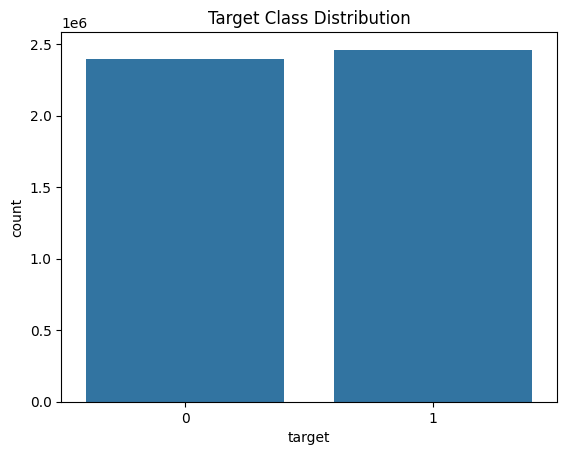

In [14]:
# Count and percentage of each class
target_counts = df['target'].value_counts()
target_percent = df['target'].value_counts(normalize=True) * 100

print("Class Counts:\n", target_counts)
print("\nClass Distribution (%):\n", target_percent)

# Optional: Visualize
sns.countplot(data=df, x='target')
plt.title("Target Class Distribution")
plt.show()

The dataset shows a balanced binary classification target where:

	•	Class 1 (indicating price went up) accounts for 2,460,347 records (~50.64%)
  
	•	Class 0 (indicating price went down or stayed the same) has 2,397,744 records (~49.36%)

This near-even split is confirmed visually in the attached bar chart, where both bars are of similar height. The minimal imbalance (just over 1% difference) suggests that no special handling like resampling or weighting is necessary for most classification models.


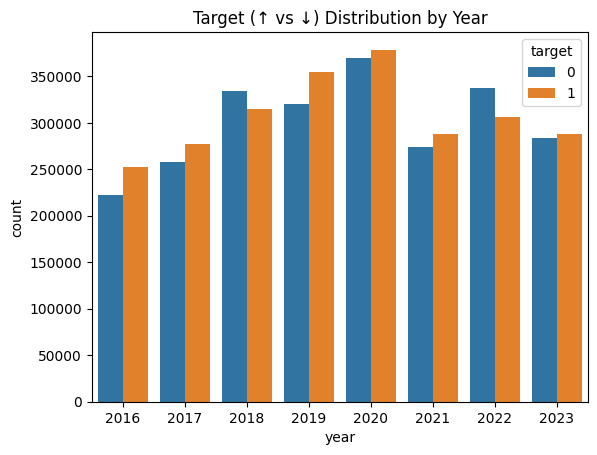

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target distribution over time
df['year'] = df['date'].dt.year
sns.countplot(x='year', hue='target', data=df)
plt.title("Target (↑ vs ↓) Distribution by Year")
plt.show()

The bar chart illustrates the annual distribution of upward (↑, target=1) and non-upward (↓, target=0) stock price movements from 2016 to 2023. Key observations:

	•	Steady growth in total records from 2016 to a peak in 2020, followed by a dip in 2021, then partial recovery.

	•	In most years, the classes are close to balanced, with slight yearly variation.

	•	2020 shows the highest volume of both upward and downward movements—likely due to increased market volatility during the pandemic.
  
	•	Post-2020 shows a decline in total entries, possibly reflecting fewer trading days, reduced symbol coverage, or stricter data filtering in recent years.

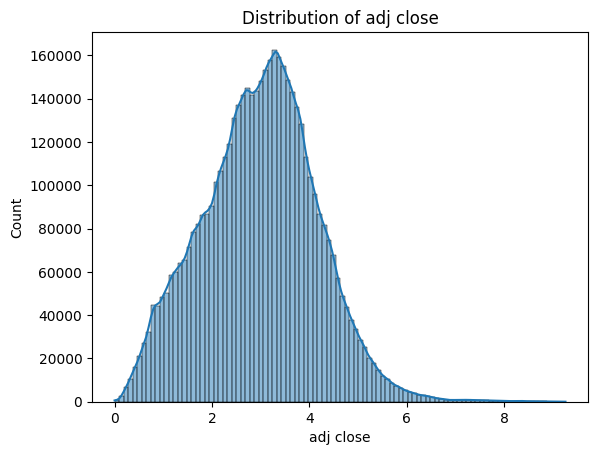

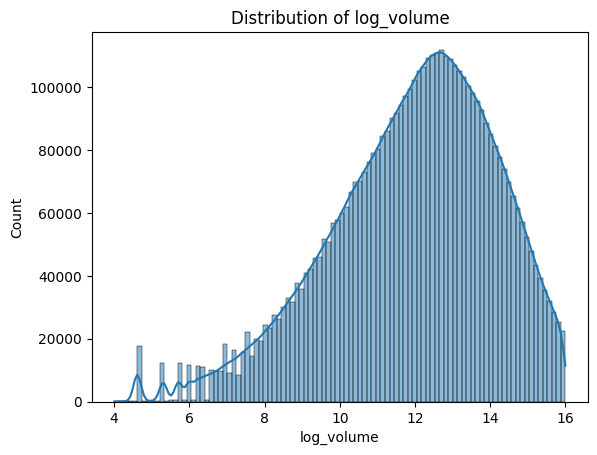

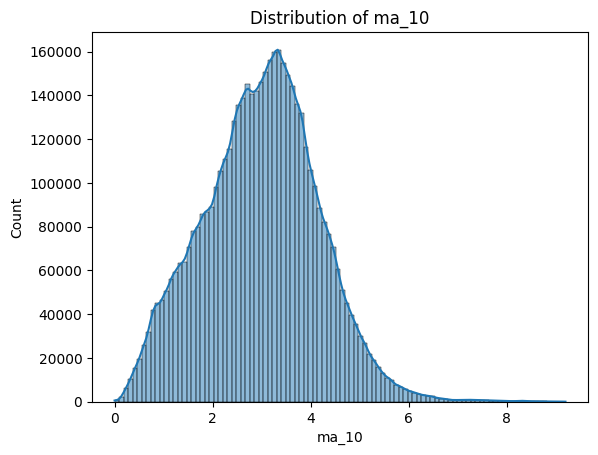

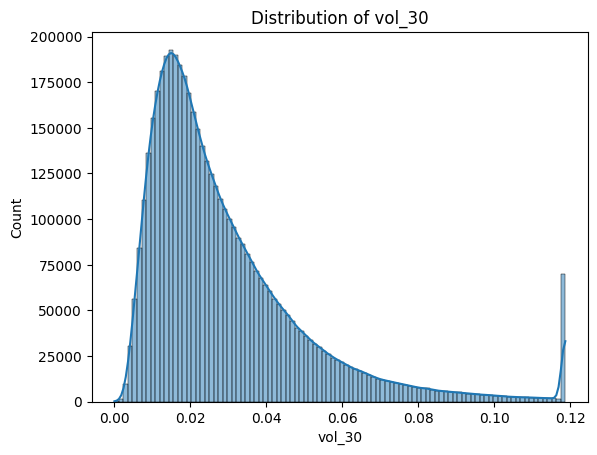

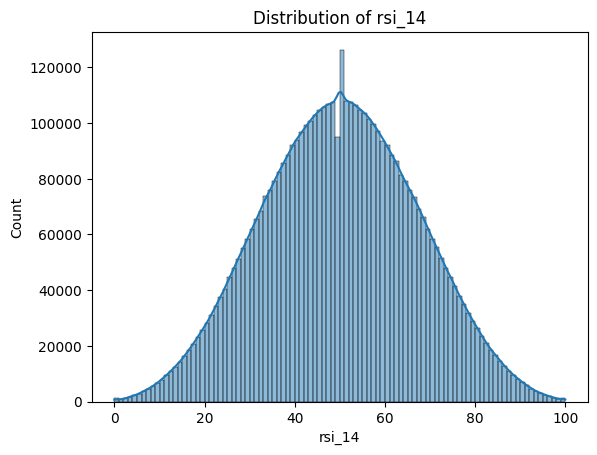

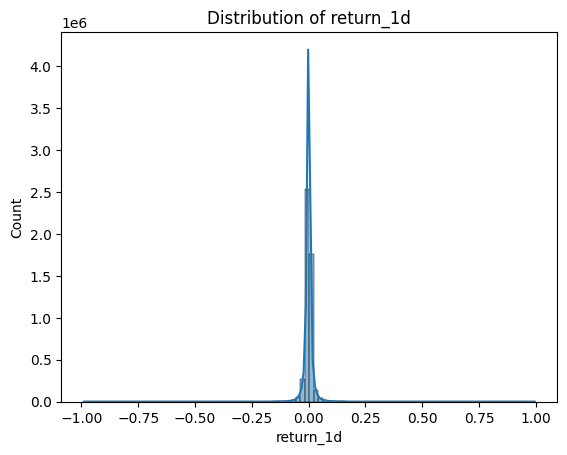

In [16]:
# Price Feature Distributions
price_feats = ['adj close', 'log_volume', 'ma_10', 'vol_30', 'rsi_14', 'return_1d']

for col in price_feats:
    sns.histplot(df[col], bins=100, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

Distribution of Adjusted Close (adj close)

The distribution of adjusted close prices is right-skewed, with the bulk of the data concentrated between 1 and 4. This long tail on the right suggests a small number of high-value stocks. The distribution appears smooth and unimodal, indicating a relatively stable price structure, though it may benefit from a log transformation if used directly in modeling due to the skewness.

Distribution of Log Volume (log_volume)

The log-transformed volume variable is approximately bell-shaped with a peak between 12 and 13, but there is some left-side noise or multimodality at lower volumes (around 4 to 8). These outliers or noise might correspond to extremely low-trading stocks, possibly illiquid assets. The log transformation has already helped reduce extreme skew, making this feature more model-friendly.

Distribution of Moving Average (ma_10)

The 10-day moving average (ma_10) closely mirrors the shape of adj close, as expected, with a right-skewed distribution. Since it’s a smoothed version of closing prices, it reflects the same underlying structure but with less volatility. The smooth shape validates the logic and behavior of this derived feature and suggests it can be useful for trend modeling.

Distribution of Volatility (vol_30)

The 30-day volatility (vol_30) is heavily right-skewed, with most values clustered below 0.05 and a long tail stretching toward 0.12. This distribution suggests that most stocks exhibit low daily volatility over a 30-day window, with a small portion experiencing higher fluctuations. The spike at the tail end might be due to capping or concentration at the 99th percentile.

Distribution of RSI (rsi_14)

The Relative Strength Index (RSI) over 14 days shows a bell-shaped and nearly symmetric distribution, peaking around 50. This is expected for RSI, which naturally ranges between 0 and 100. The distribution suggests that most stocks spend time in neutral territory (30 < RSI < 70), without frequent overbought or oversold conditions. This stability supports RSI’s role as a momentum indicator.

Distribution of Daily Return (return_1d)

The daily return distribution is extremely narrow and sharply peaked around 0, with long tails on both sides. This is characteristic of return distributions, where most movements are small, but occasional large swings occur. The sharp spike at zero may include many flat days or micro-returns near zero due to rounding.


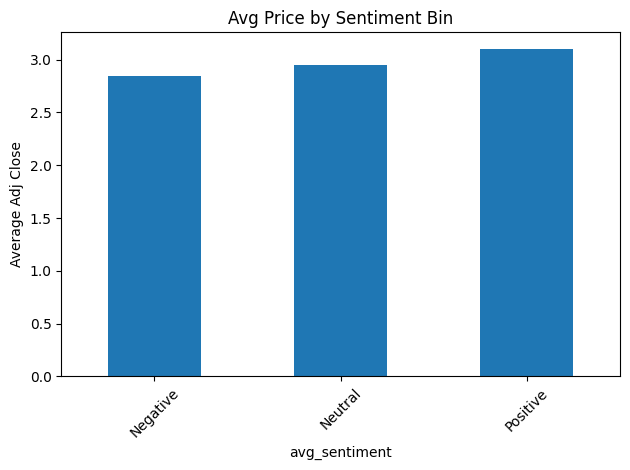

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Define bins and labels (only 3 categories)
bins = [-1.01, -0.05, 0.05, 1.01]
labels = ['Negative', 'Neutral', 'Positive']

# Group using temporary binning without creating a new column
avg_prices = df.groupby(pd.cut(df['avg_sentiment'], bins=bins, labels=labels), observed=True)['adj close'].mean()

# Plot the average adjusted close per sentiment bin
avg_prices.plot(kind='bar', title='Avg Price by Sentiment Bin')
plt.ylabel('Average Adj Close')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart shows the relationship between average news sentiment and the adjusted closing price of stocks. The results follow an intuitive pattern - stocks associated with positive sentiment tend to have the highest average adjusted close price, followed by those with neutral sentiment, while those with negative sentiment have the lowest average price. While the differences are not dramatic, the upward trend across sentiment bins suggests that positive sentiment is correlated with higher stock prices, supporting the usefulness of sentiment as a potential predictive feature. This validates the incorporation of avg_sentiment into modeling, particularly when fused with price or volatility features.

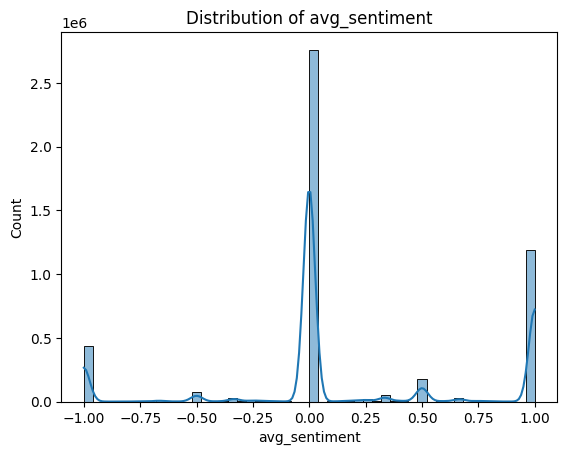

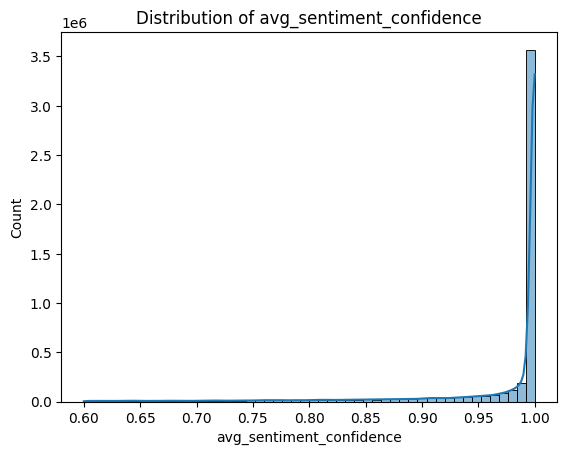

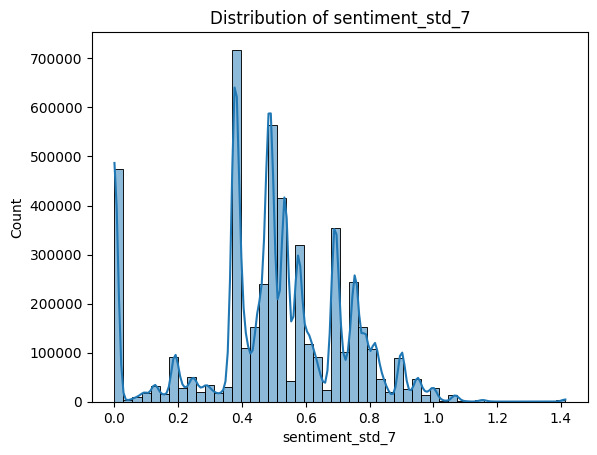

In [21]:
# Sentiment Feature Distributions
sentiment_feats = ['avg_sentiment', 'avg_sentiment_confidence', 'sentiment_std_7']

for col in sentiment_feats:
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

Distribution of avg_sentiment

The distribution of avg_sentiment reveals a heavily skewed and multimodal structure, with three dominant peaks at approximately -1.0, 0.0, and +1.0. These peaks indicate that the majority of sentiment scores are concentrated at extreme values (strongly negative or positive) or are completely neutral. The tallest spike around 0 shows that a very large proportion of the news articles are tagged with a sentiment score near zero, implying neutral market sentiment. Meanwhile, significant densities at -1 and +1 suggest the presence of many news instances with highly polarized sentiments. This discrete and clustered pattern is likely a reflection of FinBERT’s sentiment classification behavior, where scores are often mapped directly to categorical outcomes (negative, neutral, positive), leading to sharp concentration at these thresholds.

Distribution of avg_sentiment_confidence

The distribution of avg_sentiment_confidence is extremely right-skewed, with the overwhelming majority of values concentrated near 1.0. This indicates that the sentiment classification model (FinBERT) assigns high confidence scores for its sentiment predictions in most cases. The long, low tail extending toward 0.6 shows that only a small fraction of the samples are associated with lower confidence levels. Such a distribution suggests that the model is rarely uncertain in its predictions, which can be both a strength (clear predictions) and a risk (overconfidence). This trend may also indicate that the majority of news headlines used in the dataset are clear in tone, making it easy for the model to confidently assign sentiment categories.

Distribution of sentiment_std_7

The sentiment_std_7 distribution, which likely represents the 7-day rolling standard deviation of sentiment scores, displays a complex multimodal shape with several distinct spikes between values of 0 and 1.4. This indicates a wide variety of volatility levels in sentiment over time. Lower standard deviation values around 0–0.3 suggest that some stocks or time windows experience stable, consistent sentiment (e.g., mostly neutral or same-sentiment news). However, the dense and jagged clustering between 0.4 and 0.8 signifies that a large portion of the data exhibits moderate fluctuations in sentiment. This feature may be particularly valuable in modeling market sentiment volatility and linking it to stock price movement or investor reaction patterns. The presence of very low and very high values further highlights heterogeneity across the dataset in terms of sentiment stability.




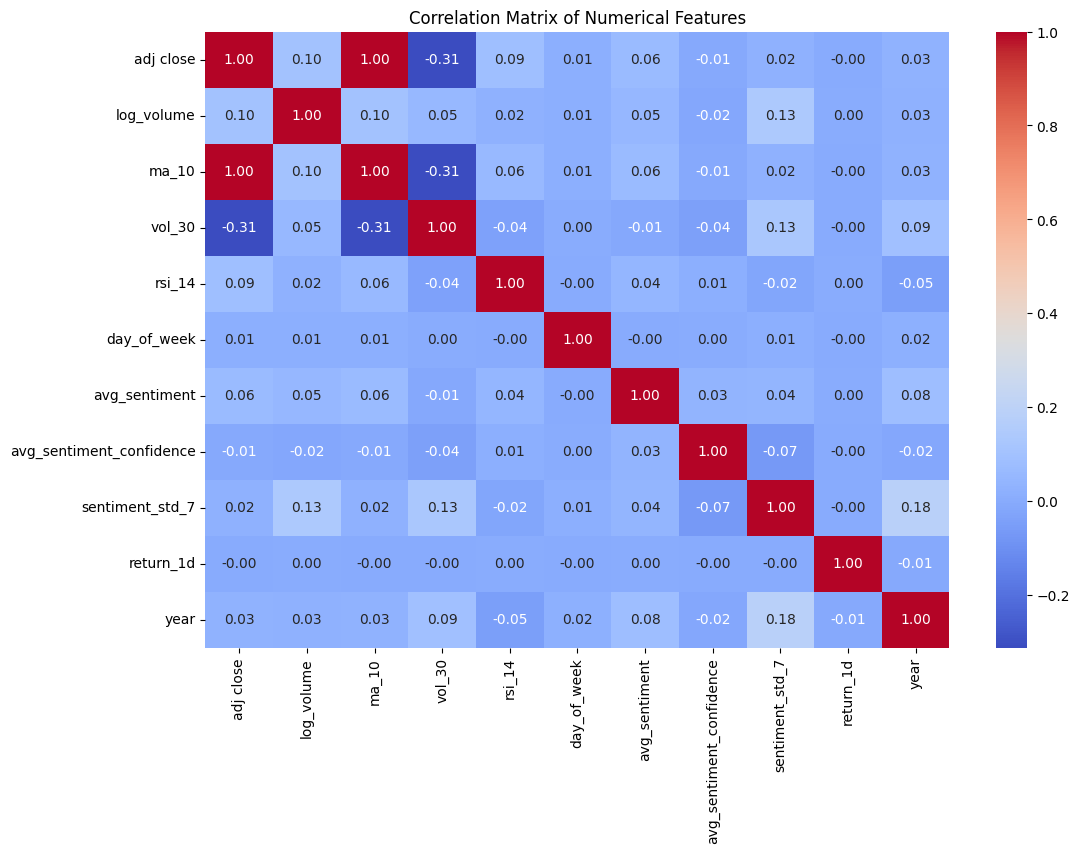

In [22]:
# Correlation Matrix
import numpy as np

# Only numerical columns
num_cols = df.select_dtypes(include=np.number).drop(columns=['target'])
corr_matrix = num_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

The correlation matrix offers a comprehensive view of linear relationships among the numerical features in the dataset. As expected, the adjusted close price (adj close) shows a perfect positive correlation with ma_10 (10-day moving average) at 1.00, as moving averages are directly derived from the price itself. It also has a modest negative correlation with vol_30 (30-day rolling volatility) at -0.31, suggesting that higher volatility tends to coincide with lower stock prices, potentially reflecting market uncertainty or negative sentiment. Notably, log_volume has low correlations with most variables, though it is slightly positively correlated with sentiment_std_7 (0.13), possibly reflecting increased trading activity during periods of sentiment fluctuation.

The sentiment-related features show minimal correlation with stock prices. For example, avg_sentiment correlates weakly with adj close (0.06) and is almost uncorrelated with return_1d (0.00), indicating that raw sentiment scores alone may not provide strong direct predictive power for short-term returns. sentiment_std_7, a measure of sentiment volatility, has a mild positive correlation with vol_30 (0.13) and year (0.18), which might reflect changes in market behavior or sentiment signal quality over time.

Overall, the matrix highlights that most features are weakly correlated with each other, indicating low multicollinearity—an advantageous property for modeling.

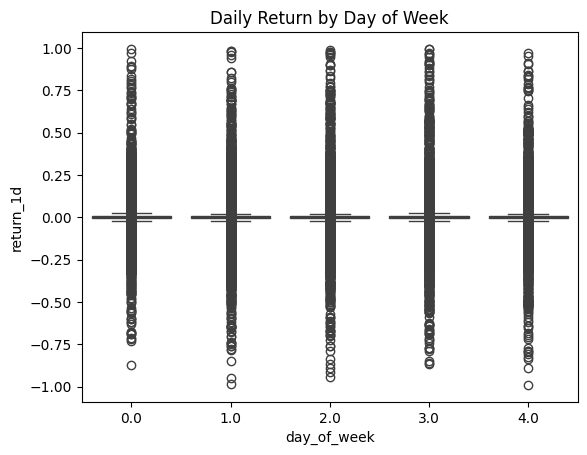

In [23]:
# Seasonality/Weekday Trends
sns.boxplot(x='day_of_week', y='return_1d', data=df)
plt.title("Daily Return by Day of Week")
plt.show()

The boxplot depicting return_1d across different day_of_week values (0 = Monday, 4 = Friday) explores potential weekday effects in stock returns, often associated with market seasonality. Visually, all five boxplots appear quite similar in terms of median return (hovering around zero), interquartile range, and spread of outliers. This suggests that daily returns do not exhibit strong or consistent variation across different days of the week, at least at the distributional level. The presence of many extreme outliers on all days—both positive and negative—implies that large fluctuations occur independently of the day, likely driven by external news or market-specific events rather than weekday effects.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


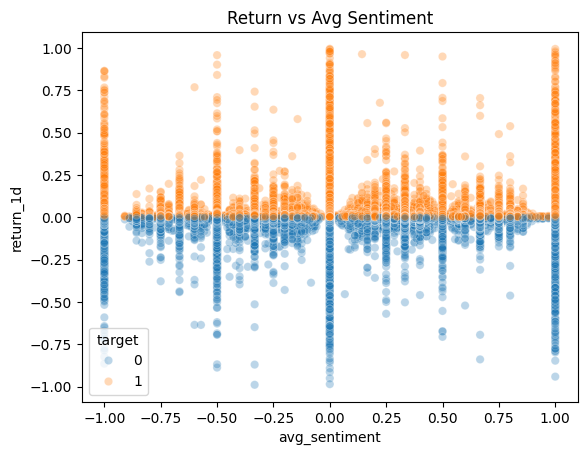

In [24]:
# Sentiment vs Return Scatter Plot
sns.scatterplot(data=df, x='avg_sentiment', y='return_1d', hue='target', alpha=0.3)
plt.title("Return vs Avg Sentiment")
plt.show()

The scatter plot illustrates the relationship between avg_sentiment (x-axis) and return_1d (y-axis), with color-coded classes for the target variable (0 = negative or zero return, 1 = positive return). A few important patterns emerge. First, the plot confirms a strong class imbalance around the neutral sentiment value (0), with extremely dense vertical lines at exact values such as -1, 0, and +1. These spikes indicate frequent model outputs at these extremes—likely artifacts of how the sentiment model (e.g., FinBERT) processes highly opinionated or ambiguous language.

In terms of target separation, the orange points (positive returns) cluster more prominently in regions where avg_sentiment is positive, particularly around 0.25 to 0.75. Conversely, blue points (non-positive returns) are more prevalent in the negative sentiment range. However, the distribution is still highly overlapping, especially near the center, suggesting sentiment alone is not a strong predictor of return direction without further context.

The dense horizontal streaks at return_1d = 0 also suggest that many observations had little to no price change regardless of sentiment, possibly due to low trading volume or news with limited market impact. While there is a mild positive correlation between sentiment and returns, the overlap and noise indicate that avg_sentiment is weakly informative in isolation, and should be combined with confidence, volatility, or time-sensitive features to better predict direction.